# Pandas

Trying to explain introductory Pandas use.

Pandas is another module that, like numPy, is widely used in the scientific community. We'll look at how it is commonly used to read in files to a Pandas _'dataframe'_ which is something like a cross between a 2D numPy array and a spreadsheet sheet (the Pandas 1D equivalent is called a _Series_). It allows the data to be processed and manipulted in many ways - we'll look at some of the basic methods used.

We've provided a small CSV file called 'observatories_Demo.csv' which should be put into the same folder as this notebook. If this were opened in a spreadsheet it would look like this:

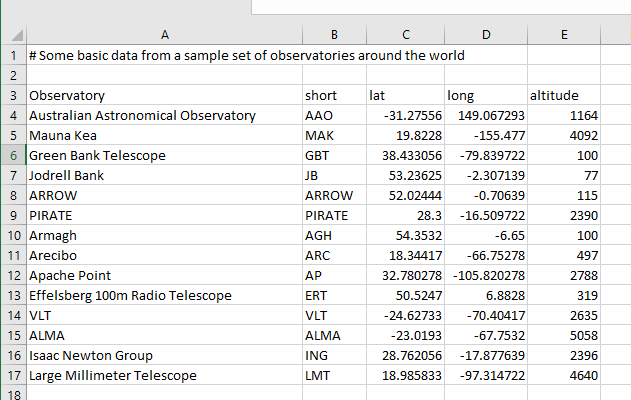

Notice that the first 2 rows are either a comment or blank. The 3rd row shows the data column names and the actual data starts on the 4th line.

Let's read this in using Pandas and see how to perform some basic functions.

First, do your imports and set up any other constants or Jupyter settings


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now let's read in the file to a pandas datframe.

Things to note:

We've told Pandas that the columns are delimted by ',' - actually this is the default but you could change this to any other character that is used in the file. (If it's space delimited use sep='\s+')

We've also told it to miss the first 2 lines by using 'header=2'.

In [ ]:
df = pd.read_csv('observatories-DEMO.csv', sep=',', header=2)


So what does it look like? just type the datframe's name.

Things to note:

Pandas has recognised that the firts actual line it comes to (after the 'header' has been skipped) is the actual names of the columns. You can explicitly change this behaviour if you want to.

It has automatically 'indexed' the rows (the numbers on the left) based on the order the rows appear in the file We'll be changing this later, indexing on a column.

You can also


In [ ]:
df

## EXERCISE

Just using 'df' gives a nicely formatted output. Try running print(df) as an alternative



You can also just look at the first few or last few rows:


In [ ]:
df.head(4)

In [ ]:
df.tail(3)

# ADDING MORE DATA

Lets add a row for Jodrell Bank radio observatory in Cheshire, UK. You'll need to set up a Dict object where the keys are the column identifiers and the values are the ...er... values!

We can then append it to our datframe - and this produces a NEW dataframe (doesn't modify the currect one) which we can asign to a new variable. Note that we have to set the parameter 'ignore_index=True')

A word of warning, becuase this method creates a completely new dataframe it can use considerable memory for large data sets. There are other, more economical (but oiften slower) ways. (df.loc[len(df)] = ['blah blah', 'BB', 53, 2, 100], modifies df insitu) RTFM.


### Rows

In [ ]:
new_row = {'Observatory':'Jodrell Bank', 'short':'JB', 
           'lat':53.23625, 'long':-2.307139, 'altitude':77}

df_mod = df.append(new_row, ignore_index=True)

df_mod


### Columns

How about adding a column. You can add a column with a simple, default value like this:

**`df['new_column_name'] = 42`**

Probably more usefully, we'll add a column, named 'hemisphere', that indicates if the observtory is 'Southern' or 'Northern'. This is tricky but can be done based on numpy's '**`where()`**' function, which does a boolean comparison and returns its first or second parameter based on the boolean.


In [ ]:
df_mod['hemisphere'] = np.where(df_mod['lat'] <0, 'Southern', 'Northern')
df_mod


# Writing the modified data back to disk

You can, of course, now write this back to a file. Pandas makes this, as a meerkat might say, 'simples!'.

The 'index=False' just ensures that you don't get a column with 0,1,2,3,... in the file. 


In [ ]:
df_mod.to_csv('observatories-MODIFIED.csv',index=False)

# ACCESSING SECTIONS OF YOUR DATA


### Columns

You can access a single column by using the name of the column. Like this:

(Note that you can combine this with **`head()`** and **`tail()`** -  **`df['Observatory'].head())`**



In [ ]:
df_mod['Observatory']


Note that, at the bottom of the listing, it shows this is an 'object'. In fact the object is a Pandas Series in this case. You could convert this to a numpy array (**`np.array(df_mod['Observatory'])`** or even a normal Python list (**`list(df_mod['Observatory'])`**).


## EXERCISE

Display the last 3 rows of the 'short' column


In [ ]:
df_mod['short'].tail(3)

### Rows

Selecting rows is a little less intuitive. We'll look at using '**.iloc**' (which uses numerical indices) and logic based selections here.Then, later, after talking about indexing we'll show a further method, based on a modified index.

**iloc**

Firstly using **.iloc**. This is similar to using numPy slices and is something along the lines of datframe[startRow-1:endRow, startCol-1:endCol]  

Let's look at finding rows 3 to 5 (Green Bank to PIRATE, indexed as 2,3 and 4 - Remember indices start at 0)


In [ ]:
df_mod.iloc[2:5,:]


Extending the 'slices' approach we can restrict the number of columns at the same time:
    

In [ ]:
df_mod.iloc[2:5,1:4]

**Logic based selections**

Now for the 'logic' based selection. For this we'll be using **loc**

We might, for example, just want to use the Southern observatories:
    

In [ ]:
df_mod.loc[df_mod['lat'] < 0]


(Note: actually **`df[df['lat'] <0]`** will also work just fine.)



Or the ones that are at an altitude of over 4000 metres:


In [ ]:
df_mod.loc[(df_mod['altitude'] > 4000)]

## EXERCISE

How would you get all the southern observatories over 4000m high? (HINT don't use 'and' you'll need to use '&')


In [ ]:
df_mod.loc[(df_mod['altitude'] > 4000) & (df['lat'] < 0)]

 # INDEXING

At the moment, the row index is pretty much like any other list or array - starting at 0 and incrementing. But we can modify this by indexing on a column. Let's say we want to be able to get easy acces to data based on the 'short' column. This uses the '**`.set_index()`** function. (You can reindex 'inplace' by passing the parameter **`'inplace=True'`**)

So, using our example and indexing on 'short' (**Note, the `drop=False` is important because if we don't do this and re-index later we'd loose the column name 'short'**) we get:


In [ ]:
df_mod.set_index('short', inplace=True, drop=False)
df_mod


Note that the index is now based on the short names

This is useful because we can now acces rows more 'naturally'


In [ ]:
df_mod.loc['ARC',:]


As we noted earlier, this doesn't look like a row - and it isn't. However, as before, you can easily turn it into a list or numPy array by using **`df.get_values()`** or **`np.array(df)`**. You can also access values from it using the attribute names shown ('Observatory', 'short', 'lat' etc.)


In [ ]:
row_obj = df_mod.loc['ALMA',:]
print('The longitude of', row_obj.Observatory, 'is', row_obj.long, 'degrees')
print('It is a', row_obj.hemisphere, 'observatory')
nump_row=row_obj.get_values()
print('The numPy array is', nump_row)

**Single values**

And, of course, you can get a single value from the DatFrame:

In [ ]:
df_mod.loc['ARC','altitude']

## EXERCISE

What is the name of the highest observatory and what are its coordinates (using North/South and W/E)

HINT: 

1. Find the highest altitude (use the np.max() function on a row)
2. use this to search and get the row
3. retreive the lat and long
4. do some string formating stuff 
5. print it out


In [ ]:
# Get highest observatory
alt_max = np.max(df_mod['altitude'])
# Which row is this in?
highest_row=df_mod.loc[df_mod['altitude']==alt_max]
# use the attribute names. In each case a Series is returned with only a single item
# hence we use the [0] to get this.
lat = (float(highest_row.lat[0]))
# and longitude
lon = (float(highest_row.long[0]))
# and the name
nam = highest_row.Observatory[0]
# Construct the latitude string - check if <0, get the string value of
# the absolute value and add '-S' etc. accordingly
if lat<0:
    latval = str(abs(lat))+'-S'
else:
    latval = str(abs(lat))+'-N'
if lon<0:
    lonval = str(abs(lon))+'-W'
else:
    lonval = str(abs(lon))+'-`e'

print('The highest observatory is', nam,'at', lonval, ' ', latval)


# **GETTING RID OF STUFF WE DON"T WANT**

What if we don't want everything in the DataFrame? It is possible to get rid of (Drop in Pandas parlance) data.

### Rows

Use the **`.drop()`** function with a row name (if indexed) or numeric index if not. If it is indexed and you want to use a numberic index, use the **`df.index()`** function. We also need to specify which 'axis' is to be dropped. **`axis[0]`** refers ro a row (and **`axis[1]`** refers to a column - see later)


In [ ]:
df_drop = df_mod.drop('ERT',axis=0)
df_drop


In [ ]:
df_drop_num = df_drop.drop(df_drop.index[9], axis=0)
df_drop_num

### Columns

are pretty much the same:
    

In [ ]:
df_drop_col = df_drop_num.drop('altitude', axis=1)
df_drop_col


# ROUNDUP

So that is just a basic rundown of Pandas. It has many more features which are not touched on here, but these should be enough to get you started.


**Just for fun - plotting data**

See if you can see how it's done


In [ ]:
sorted_data=df_mod.sort_values(by='altitude')['altitude']
sorted_data.plot(kind='bar', color='r')
plt.title('Observatories ranked by altitude')
plt.ylabel('Altitude (m)')
plt.xlabel('Observatory short name')